### Fill in group number and member names:

In [1]:
GROUP = "21"
NAME1 = "Ali Bakly"
NAME2 = "NA"

# Optimization for learning - FRTN50

## Assignment 2

The purpose of this assignment is to empirically explore some convergence and implicit regularization properties of the stochastic gradient decent (SGD) method and some of its variants. These properties are mainly explored by considering simple polynomial fitting problems in $\mathbb{R}$ to facilitate easy comparison with known theoretical results and easy visualization. We will also compare the same fitting problem with multi-layer perceptrons also known as fully connected feedforward neural networks.

Below are the tasks that you need to solve. Keep this in mind:
- Carefully motivate every step in your calculations.
- Use figures and tables to motivate your answers.
- Figures must have appropriately labeled axes and must be referenced in the main text.
- Your code should be written in a quite general manner, i.e., if a question is slightly modified, it should only require slight modifications in your code as well. 
- Comment your code well. 
- Make sure you plot in such a way that small quantities are visible. In particular, use log-linear plots, where the quantity that should go to $0$ is on the $y$-axis using logarithmic scale, and the iteration number $k$ on the $x$-axis using linear scale.
- What you need to submit to Canvas:
    - This jupyter notebook containing your solutions.
    - An exported pdf version of the jupyter notebook.

---
### Exercise 1: Polynomial fitting in $\mathbb{R}$ using least squares with a polynomial feature map

Consider fitting the points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$ to a polynomial model $m(\cdot;\theta):\mathbb{R}\rightarrow\mathbb{R}$ using the method of least squares. Here, the model is given by

$$
\begin{align}
    m(x;\theta) = \theta^{T}\phi(x)
\end{align}
$$

where $\theta\in\mathbb{R}^{n+1}$ is the parameter of the model and $\phi:\mathbb{R}\rightarrow\mathbb{R}^{n+1}$ is a polynomial feature map given by

$$
\begin{align}
    \phi(x) = 
    \begin{bmatrix}
    1 \\
    x \\
    \vdots \\
    x^{n}
    \end{bmatrix}
\end{align}
$$
for each $x\in\mathbb{R}$.

I.e. $m(\cdot;\theta)$ is a polynomial (in particular nonlinear) model of degree $n$ and is linear in the parameter $\theta$. If we compare to deep learning, the model $m(\cdot;\theta)$ would have a specific structure but would be nonlinear in the parameter $\theta$ in general.

The method of least squares involves solving the optimization problem

$$
\begin{equation}\label{eq:1}\tag{1}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& & \frac{1}{N} \sum_{i=1}^{N}(m(x_{i};\theta) - y_{i})^{2} = \frac{1}{N} \sum_{i=1}^{N}\underbrace{(\theta^{T}\phi(x_{i}) - y_{i})^{2}}_{=f_{i}(\theta)} = \frac{1}{N} \sum_{i=1}^{N}f_{i}(\theta) 
\end{aligned}
\end{equation}
$$

giving an optimal point $\theta^{*}\in\mathbb{R}^{n+1}$, and letting $m(\cdot;\theta^{*})$ be the fitted model. If we let 

$$
\begin{align}
    X = 
    \begin{bmatrix}
    \phi(x_{1})^{T} \\
    \vdots \\
    \phi(x_{N})^{T} 
    \end{bmatrix}\in\mathbb{R}^{N \times (n+1)},  \quad \text{ and } \quad
    Y = 
    \begin{bmatrix}
    y_{1} \\
    \vdots \\
    y_{N}
    \end{bmatrix}\in\mathbb{R}^{N},
\end{align}
$$

optimization problem $\eqref{eq:1}$ can be written as 

$$
\begin{equation}\label{eq:2}\tag{2}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& & \frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2} = f(\theta).
\end{aligned}
\end{equation}
$$

Since the model $m(\cdot;\theta)$ is linear in $\theta$, the function $f$ is convex in $\theta$. This is not the case in deep learning, since the model $m(\cdot;\theta)$ would not be linear in $\theta$ in general.

If the points $x_{i}$ in $\{(x_{i},y_{i})\}_{i=1}^{N}$ are distinct, which is the case in our analysis, it holds that 

$$
\begin{align}
    \text{rank } X = \min(N,n+1).
\end{align}
$$
(See [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) for more info.) In particular,
1. if $N < n+1$, optimization problem $\eqref{eq:2}$ is underdetermined, $X X^{T}$ is invertible and there exist $\theta^{*}\in\mathbb{R}^{n+1}$ such that $X\theta^{*} = Y$,
2. if $N > n+1$, optimization problem $\eqref{eq:2}$ is overdetermined and $X^{T} X$ is invertible,
3. if $N = n+1$, both $X X^{T}$ and $X^{T} X$ are invertible and optimization problem $\eqref{eq:2}$ is neither underdetermined nor overdetermined.

You are allowed to assume these facts as given.

---
__a)__ A model is sometimes said to be overparameterized if it has more parameters than data points. By the same token, a model is said to be underparameterized if it has less parameters than data points. 

- Suppose that our model is overparameterized. Which case of 1., 2. and 3. above does this corresponds to? 
- Suppose that our model is underparameterized. Which case of 1., 2. and 3. above does this corresponds to? 

Motivate your answer. It is crucial that you get this right to avoid confusion later.

__Solution:__ 

- The model in case 1. $(n+1 > N)$ is overparameterized. The model is overparameterized because the number of parameters is larger than the number of data points.
- The model in case 2. $(n+1 < N)$ is underparameterized. The model is underparameterized because the number of parameters is smaller than the number of data points.

---
__b)__ Find $\nabla f$, $\nabla f_{i}$ and $\nabla^{2}f$.

Carefully motivate your answer.

__Solution:__ 

$$
f(\theta) = \frac{1}{N}\|X\theta - Y\|_2^2 = \frac{1}{N}(X\theta - Y)^T(X\theta - Y)
$$

Expanding this expression:

$$
f(\theta) = \frac{1}{N}((X\theta)^T - Y^T)(X\theta - Y)
$$

$$
= \frac{1}{N}((X\theta)^T X \theta - (X\theta)^T Y - Y^T X \theta + Y^T Y)
$$

Recognizing that $(X\theta)^T Y = Y^T X \theta = \theta^T X^T Y$ since it is a scalar:

$$
f(\theta) = \frac{1}{N}(Y^T Y - 2\theta^T X^T Y + \theta^T X^T X \theta)
$$

Now, differentiating $f(\theta)$ with respect to $\theta$:

$$
\nabla f(\theta) = \frac{1}{N}(-2X^T Y + 2X^T X \theta) = \frac{2}{N}X^T(X\theta - Y)
$$

For the Hessian $\nabla^2 f(\theta)$:

$$
\nabla^2 f(\theta) = \frac{2}{N} X^T X
$$

For the individual loss function for each sample $f_i(\theta) = (\theta^T \phi(x_i) - y_i)^2$, by the chain rule, we get:

$$
\nabla f_i(\theta) = 2\phi(x_i)(\phi(x_i)^T \theta - y_i)
$$

---
__c)__ Since $f$ is convex and differentiable, all optimal points $\theta^{*}\in\mathbb{R}^{n+1}$ to the least squares problem are fully characterized by the condition that

$$
\begin{align*}
    \nabla f (\theta^{*}) = 0.
\end{align*}
$$

Suppose that the least squares problem is underparameterized. 

- Show that there exists a solution $\theta^{*}$
- Conclude that it is unique
- Find a expression for $f(\theta^{*})$

Carefully motivate your answer.

__Solution:__ 

$$
\nabla f (\theta^{*}) = 0 \iff 2X^T(X\theta^{*} - Y) = 0 \iff X^T X \theta^{*} - X^T Y = 0 \iff X^T X \theta^{*} = X^T Y \iff \theta ^{*} = (X^T X)^{-1} X^T Y
$$
since $X^T X$ is invertible in the underparameterized case.

Uniqueness follows from the fact that $X$ has full rank as $\text{rank}(X) = \min(N, n+1) = n+1$, which means $X^T X$ is invertible giving us an explicit solution. We can find an expression for $f(\theta^*)$ as follows:

$$
\begin{align*}
f(\theta^*) &= \frac{1}{N}\| X(X^T X)^{-1} X^T Y - Y \|_2^2 
\end{align*}
$$


---
__d)__ Suppose instead that the least squares problem is overparameterized. Let $\theta^{*}\in\mathbb{R}^{n+1}$. Show that $\theta^{*}$ is a solution to the least squares problem if and only if $X\theta^{*} = Y$. I.e. show that:
- If $\theta^{*}$ is a solution to the least squares problem, then $X\theta^{*} = Y$.
- If $X\theta^{*} = Y$, then $\theta^{*}$ is a solution to the least squares problem.

Hence, the solution set is an affine set that can be written as $\Theta^{*}  = \{\theta^{*} \in\mathbb{R}^{n+1}: X\theta^{*}=Y\}$.
- Prove that the set $\Theta^{*}$ is affine.

Carefully motivate your answer.

_Hints:_ Note that $f(\theta)=\frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2}\geq 0$ for all $\theta\in\mathbb{R}^{n+1}$. Moreover, what can be said in the overparameterized case? What is the definition of an affine set?

__Solution:__ 

Suppose that $\theta^*$ is an optimal solution to the least squares problem. Since $f(\theta) \geq 0$ for all $\theta \in \mathbb{R}^{n+1}$ and $f(\theta^*)$ is minimized, we must have:

$$
f(\theta^*) = 0
$$

This implies that:

$$
\|X\theta^* - Y \|_2^2 = 0 \iff X\theta^* - Y = 0 \iff X\theta^* = Y
$$

Thus, if $\theta^*$ is an optimal solution to the least squares problem, then $X\theta^* = Y$.

Conversely, suppose that $X\theta^* = Y$. The gradient of $f(\theta)$ is given by:

$$
\nabla f(\theta^*) = \frac{2}{N} X^T (X\theta^* - Y)
$$

Substituting $X\theta^* = Y$ into the gradient expression:

$$
\nabla f(\theta^*) = \frac{2}{N} X^T (Y - Y) = 0
$$

Since $\nabla f(\theta^*) = 0$, by part (c), $\theta^*$ is an optimal solution to the least squares problem. Therefore, we have shown that:

- If $\theta^*$ is a solution to the least squares problem, then $X\theta^* = Y$.
- If $X\theta^* = Y$, then $\theta^*$ is a solution to the least squares problem.

Hence, the solution set can be written as:

$$
\Theta^* = \{\theta^* \in \mathbb{R}^{n+1} : X\theta^* = Y\}
$$

__Proving that $\Theta^*$ is an affine set:__

To prove that $\Theta^*$ is an affine set, we need to show that any affine combination of two elements in $\Theta^*$ also belongs to $\Theta^*$. Let $\theta_1, \theta_2 \in \Theta^*$ and $\alpha \in \mathbb{R}$.

Since $\theta_1, \theta_2 \in \Theta^*$, by definition, we have:

$$
X\theta_1 = Y \quad \text{and} \quad X\theta_2 = Y
$$

Now, consider the affine combination of $\theta_1$ and $\theta_2$:

$$
\alpha \theta_1 + (1 - \alpha) \theta_2
$$

Applying the matrix $X$ to this affine combination:

$$
X(\alpha \theta_1 + (1 - \alpha) \theta_2) = \alpha X\theta_1 + (1 - \alpha) X\theta_2
$$

Since $X\theta_1 = Y$ and $X\theta_2 = Y$, we get:

$$
\alpha Y + (1 - \alpha) Y = Y
$$

Thus, the affine combination satisfies $X(\alpha \theta_1 + (1 - \alpha) \theta_2) = Y$, which implies that:

$$
\alpha \theta_1 + (1 - \alpha) \theta_2 \in \Theta^*
$$

Therefore, $\Theta^*$ is an affine set.



---
__e)__ In the overparameterized case, the null space $\mathcal{N}(X)=\{\theta\in\mathbb{R}^{n+1}:X\theta=0\}$ has dimension $\dim\mathcal{N}(X) = n+1-N >0$. This can be shown using, e.g., the rank–nullity theorem. Suppose that $\hat\theta\in\mathbb{R}^{n+1}$ is some point that satisfies $X\hat\theta = Y$ and that $v\in\mathcal{N}(X)$. 

- Show that $\hat\theta+v$ is a solution to the least squares problem.
- Show that $\hat\theta+\alpha v$ is a solution to the least squares problem for all $\alpha \in \mathbb{R}$. (This follows from from the above but is included to emphasize the fact that, assuming $v\neq 0$, we can add an arbitrary large vector to $\hat\theta$ and it still remains a solution to the the least squares problem.)

As a consequence, note that an another characterization of the set of solutions of the least squares problem is given by $\Theta^{*}  = \{\hat\theta + v : v\in\mathcal{N}(X) \}$. In particular, $\Theta^{*}$ has dimension $\dim\Theta^{*} = n+1-N >0$. Therefore, the more overparameterized (larger $n+1-N$) the problem is, the large the solution set $\Theta^{*}$ becomes. 

- Show that $\Theta^{*}$ and $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are equal. One way to show this is to show that all elements of $\Theta^{*}$ are in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$, i.e. $\Theta^{*}\subseteq\{\hat\theta + v : v\in\mathcal{N}(X) \}$, and that all elements in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are in $\Theta^{*}$, i.e. $\{\hat\theta + v : v\in\mathcal{N}(X) \}\subseteq\Theta^{*}$.

Carefully motivate your answer.


__Solution:__

We are given that $X\hat{\theta} = Y$ and $v \in \mathcal{N}(X)$. We need to show the following:

__1. Show that $\hat{\theta} + v$ is a solution to the least squares problem:__

We start by calculating $X(\hat{\theta} + v)$:

$$
X(\hat{\theta} + v) = X\hat{\theta} + Xv
$$

Since $v \in \mathcal{N}(X)$, we know that $Xv = 0$, so:

$$
X(\hat{\theta} + v) = X\hat{\theta} + 0 = Y
$$

Thus, $\hat{\theta} + v$ is a solution to the least squares problem.

__2. Show that $\hat{\theta} + \alpha v$ is a solution to the least squares problem for all $\alpha \in \mathbb{R}$:__

Now consider $X(\hat{\theta} + \alpha v)$, where $\alpha \in \mathbb{R}$:

$$
X(\hat{\theta} + \alpha v) = X\hat{\theta} + X(\alpha v) = X\hat{\theta} + \alpha Xv
$$

Again, since $Xv = 0$ (because $v \in \mathcal{N}(X)$), we have:

$$
X(\hat{\theta} + \alpha v) = X\hat{\theta} + \alpha \cdot 0 = Y
$$

Thus, $\hat{\theta} + \alpha v$ is a solution to the least squares problem for all $\alpha \in \mathbb{R}$.

__3. Show that $\Theta^* \subseteq \{\hat{\theta} + v : v \in \mathcal{N}(X)\}$:__

Let $\theta^* \in \Theta^*$. This means $X\theta^* = Y$. We also know that $X\hat{\theta} = Y$. Then:

$$
X\theta^* - X\hat{\theta} = X(\theta^* - \hat{\theta}) = 0
$$

This implies that $\theta^* - \hat{\theta} \in \mathcal{N}(X)$. Thus, we can write $\theta^* - \hat{\theta} = v$ for some $v \in \mathcal{N}(X)$, which gives:

$$
\theta^* = \hat{\theta} + v
$$

Therefore, $\theta^* \in \{\hat{\theta} + v : v \in \mathcal{N}(X)\}$, so we conclude that:

$$
\Theta^* \subseteq \{\hat{\theta} + v : v \in \mathcal{N}(X)\}
$$

__4. Show that $\{\hat{\theta} + v : v \in \mathcal{N}(X)\} \subseteq \Theta^*$:__

Let $\hat{\theta} + v$ be any element where $v \in \mathcal{N}(X)$. We calculate:

$$
X(\hat{\theta} + v) = X\hat{\theta} + Xv = Y + 0 = Y
$$

Thus, $\hat{\theta} + v$ is a solution to $X\theta^* = Y$, which means that $\hat{\theta} + v \in \Theta^*$. Therefore:

$$
\{\hat{\theta} + v : v \in \mathcal{N}(X)\} \subseteq \Theta^*
$$


---
__f)__ Suppose that the least squares problem is overparameterized. 

Why can we not use the solution from __c)__ in this case?

__Solution:__ 

We cannot use the solution from __c)__ in this case because  $X^{T}X \in \mathbb{R}^{(n+1)\times(n+1)}$ does not have full rank:

$$\text{ rank }(X^{T}X)=\text{ rank }(X)=\text{N}<(n+1).$$


Due to this, $X^{T}X$ is not invertible and therefore the solution form __c)__ cannot be used.

---
__g)__ Suppose that the least squares problem is overparameterized. 

We know from __d)__ and __e)__ that the set of all solutions $\Theta^{*}$ is an affine set with infinitely many elements. One way to pick a solution is to start with some candidate point $a\in\mathbb{R}^{n+1}$ and project it onto $\Theta^{*}$. Since $\Theta^{*}$ is closed, convex and nonempty, the projection point exists and is unique, and can be found by solving the optimization problem 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{2}^{2}\\
& \text{subject to}
& &  \theta \in \Theta^{*}.
\end{aligned}
\end{equation} 
$$ 

We call this the Euclidean projection problem. Another way to write the Euclidean projection problem is 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{2}^{2} + \iota_{\Theta^{*}}(\theta)
\end{aligned}
\end{equation} 
$$ 


where $\iota_{\Theta^{*}}$ is the indicator function of the set $\Theta^{*}$. By Fermat's rule, $\theta^{*} \in\mathbb{R}^{n+1}$ is an optimal point to the Euclidean projection problem if and only if the optimality condition

$$
\begin{align*}
0 \in \theta^{*} - a + \partial \iota_{\Theta^{*}}(\theta^{*})
\end{align*}
$$

holds, by convexity and since CQ holds. Note that in the exercise compendium, we show that the subdifferential of the indicator function of a set is the normal cone to that set. In particular, in our case we have that 

$$
\begin{align*}
\partial \iota_{\Theta^{*}}(\theta^{*}) &= N_{\Theta^{*}}(\theta^{*}) \\
&= 
\begin{cases}
\left\{s\in\mathbb{R}^{n}: \forall \eta\in \Theta^{*},\, s^{T}(\eta-\theta^{*})\leq 0\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&= 
\begin{cases}
\left\{s\in\mathbb{R}^{n}: \forall v\in \mathcal{N}(X),\, s^{T} v = 0\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&=
\begin{cases}
\mathcal{R}(X^{T})   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&=
\begin{cases}
\left\{X^{T}\lambda: \lambda \in \mathbb{R}^{N}\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}.
\end{cases} 
\end{align*}
$$

If we combine this with the optimality condition above we get that $\theta^{*}$ is an optimal point to the Euclidean projection problem if and only if there exists a $\lambda^{*}\in\mathbb{R}^{N}$ such that 

$$
\begin{align}
    0 = \theta^{*} - a + X^{T}\lambda^{*} \quad \text{ and } \quad X\theta^{*}=Y.
\end{align}
$$ 

Use this last optimality condition to show that $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$ is the optimal point for the Euclidean projection problem. We also call this $\theta^{*}$ the Euclidean projection (of $a$ onto $\Theta^{*}$).

Carefully motivate your answer.

_Remark:_ We have a generalization: Suppose that $H\in\mathbb{S}^{n+1}_{++}$ and let $\left\lVert \theta \right\rVert_{H}^{2} = \theta^{T}H\theta$. Then the scaled projection problem 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{H}^{2}\\
& \text{subject to}
& &  \theta \in \Theta^{*}.
\end{aligned}
\end{equation} 
$$ 

has the solution $\theta^{*} = a - H^{-1}X^{T}(X H^{-1}X^{T})^{-1}(X a-Y)$. We call this $\theta^{*}$ the scaled projection (of $a$ onto $\Theta^{*}$). You are not allowed to used this generalization to solve this problem. However, it will be used later.

__Solution:__

We are given an overparameterized least squares problem and need to find the optimal point $\theta^*$ by solving the Euclidean projection problem. 

From the optimality condition, we know that $\theta^*$ is optimal if and only if:

$$
0 = \theta^* - a + X^T \lambda^* \iff \theta^* = a - X^T \lambda^*
$$

Multiplying both sides of this by $X$, we get:

$$
X\theta^* = X(a - X^T \lambda^*) \iff X\theta^* = Xa - XX^T \lambda^*
$$

Since $X\theta^* = Y$, we can substitute this into the equation:

$$
Xa - XX^T \lambda^* = Y \iff XX^T \lambda^* = Xa - Y
$$

Since $XX^T$ is invertible in the overparameterized case, we solve for $\lambda^*$:

$$
\lambda^* = (XX^T)^{-1}(Xa - Y)
$$

Substituting this expression for $\lambda^*$ back into the equation for $\theta^*$:

$$
\theta^* = a - X^T (XX^T)^{-1} (Xa - Y)
$$

Thus, the optimal point $\theta^*$ for the Euclidean projection problem is:

$$
\theta^* = a - X^T (XX^T)^{-1} (Xa - Y),
$$

as desired result.

---
__h)__ Show that $f:\mathbb{R}^{n+1}\rightarrow\mathbb{R}$ is $\beta$-smooth, i.e., $\nabla f$ is $\beta$-Lipschitz continuous, with constant

$$
\begin{align}
    \beta = \frac{2}{N}\left\lVert X^{T}X \right\rVert_{2}.
\end{align}
$$

Recall that $\nabla f$ is said to be $\beta$-Lipschitz continuous if

$$
\begin{align}
    \left\lVert \nabla f(\theta_{1}) - \nabla f(\theta_{2}) \right\rVert_{2} \leq \beta\left\lVert \theta_{1} - \theta_{2} \right\rVert_{2}, \quad \forall \theta_{1},\theta_{2} \in \mathbb{R}^{n+1}.
\end{align}
$$

_Hint:_ Recall that the spectral norm of a matrix $A\in\mathbb{R}^{l\times m}$ is defined as 

$$
\begin{align}
    \left\lVert A \right\rVert_{2} = \sup_{z\in\mathbb{R}^{m}\setminus\{0\}}\frac{\left\lVert A z \right\rVert_{2}}{\left\lVert z \right\rVert_{2}}.
\end{align}
$$

In particular,

$$
\begin{align}
    \left\lVert A z \right\rVert_{2} \leq \left\lVert A \right\rVert_{2} \left\lVert z \right\rVert_{2}, \quad \forall z \in\mathbb{R}^{m}.
\end{align}
$$

_Remark:_ Note that $\left\lVert \cdot \right\rVert_{2}$ is the __spectral norm__ and not the __Frobenius norm__ - this difference is very important to consider in your implementation below where you will use this $\beta$. Moreover, note that $\beta$ depends on $X$, and will vary as $X$ varies.


__Solution:__ 

The gradient of the function $f(\theta)$ is given by:

$$
\nabla f(\theta) = \frac{2}{N} X^T (X \theta - Y).
$$

Now, let's calculate the difference between $\nabla f(\theta_1)$ and $\nabla f(\theta_2)$:

$$
\begin{align*}
\left\lVert \nabla f(\theta_1) - \nabla f(\theta_2) \right\rVert_2 &= \left\lVert \frac{2}{N} X^T (X \theta_1 - Y) - \frac{2}{N} X^T (X \theta_2 - Y) \right\rVert_2 \\
&= \frac{2}{N} \left\lVert X^T (X \theta_1 - Y - (X \theta_2 - Y)) \right\rVert_2 \\
&= \frac{2}{N} \left\lVert X^T X (\theta_1 - \theta_2) \right\rVert_2.
\end{align*}
$$

Using the fact that for any matrix $A$ and vector $z$, we have $\left\lVert A z \right\rVert_2 \leq \left\lVert A \right\rVert_2 \left\lVert z \right\rVert_2$, we can write:

$$
\frac{2}{N} \left\lVert X^T X (\theta_1 - \theta_2) \right\rVert_2 \leq \frac{2}{N} \left\lVert X^T X \right\rVert_2 \left\lVert \theta_1 - \theta_2 \right\rVert_2.
$$

Thus, we conclude that $\nabla f$ is $\beta$-Lipschitz continuous with constant:

$$
\beta = \frac{2}{N} \left\lVert X^T X \right\rVert_2.
$$


---
### Exercise 2: Implementing GD and SGD for polynomial fitting 
_Remark:_ You should solve this exercise using `numpy` primarily.

Consider the data point $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:

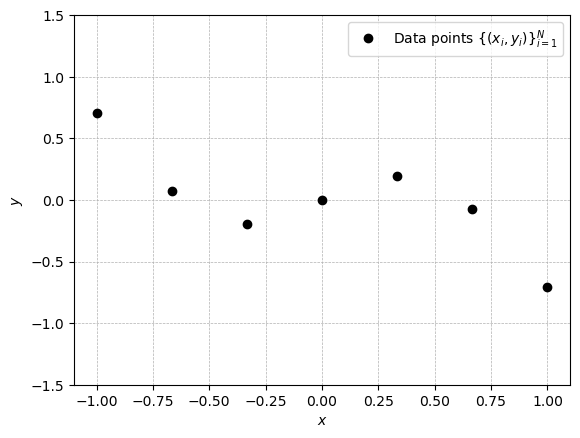

In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

In [76]:
xs

array([-1.        , -0.66666667, -0.33333333,  0.        ,  0.33333333,
        0.66666667,  1.        ])

We wish to fit a polynomial model $m(\cdot;\theta)$ of degree $n=3$ (overdetermined) and $n=9$ (underdetermined) to the data points  $\{(x_{i},y_{i})\}_{i=1}^{N}$ by solving optimization problem (1) or equivalently (2) in __Exercise 1__ above.

---
__a)__ First, do this by implementing the GD method. The GD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$
- For $k\geq 0$:
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} \nabla f(\theta_{k})$ for some $\gamma_{k}>0$.

Pick $\theta_{0} = 0$ as the initial point, and try the constant step size

1. $\gamma_{k} = 1 / \beta$,

and run for $10^5$ iterations. Here, $\beta$ is the smoothness parameter from __Exercise 1__ above. Plot, in log-linear scale, both

- $f(\theta_{k})-f(\theta^{*})$ and
- $f(\overline{\theta}_{k})-f(\theta^{*})$ where $\overline{\theta}_{k} = \frac{1}{k+1}\sum_{l=0}^{k}\theta_{l}$, (Hint: use [sequential average computation](https://math.stackexchange.com/questions/106313/regular-average-calculated-accumulatively))

as a function of iteration number $k$. Give comments:
- Describe any difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases.

_Hint:_ What is $f(\theta^{*})$ in the overdetermined and underdetermined case, respectively? 

__Solution:__ 

For the underdetermined case, where $f(\theta^*) = 0$, the convergence of $f(\theta_k) - f(\theta^*)$ is slower compared to the overdetermined case. This is because, while the system can achieve an exact solution, it takes more iterations for the function value to reach zero. Similarly, $f(\bar{\theta_k}) - f(\theta^*)$ also converges more slowly but eventually reaches zero.

In the overdetermined case, where $f(\theta^*)$ is close to zero but not exactly zero, the convergence of $f(\theta_k) - f(\theta^*)$ is faster. It quickly approaches a small positive value because the system cannot reach an exact solution. The orange curve, $f(\bar{\theta_k}) - f(\theta^*)$, converges more slowly but stabilizes at a small positive value as well.

In [165]:
def compute_f(theta, X, Y, N):
    """
    Compute the objective function f(theta) = (1/N) * ||X @ theta - Y||^2.

    Parameters:
    theta (numpy array): Parameter vector.
    X (numpy array): Design matrix of features.
    Y (numpy array): Target vector.
    N (int): Number of data points (size of Y).

    Returns:
    float: The computed objective function value.
    """
    return (1/N) * np.linalg.norm(X @ theta - Y, 2)**2

def grad_f(theta, X, Y, N):
    """
    Compute the gradient of the objective function f(theta).

    Parameters:
    theta (numpy array): Parameter vector.
    X (numpy array): Design matrix of features.
    Y (numpy array): Target vector.
    N (int): Number of data points (size of Y).

    Returns:
    numpy array: The gradient of the objective function with respect to theta.
    """
    return (2/N) * X.T @ (X @ theta - Y)

def beta(X, N):
    """
    Compute the Lipschitz constant (beta) for the gradient of f(theta).

    Parameters:
    X (numpy array): Design matrix of features.
    N (int): Number of data points (size of Y).

    Returns:
    float: The computed Lipschitz constant.
    """
    return (2/N) * np.linalg.norm(X.T @ X)

def theta_star(X, Y):
    """
    Compute the optimal solution (theta*) to the least squares problem.

    Parameters:
    X (numpy array): Design matrix of features.
    Y (numpy array): Target vector.

    Returns:
    numpy array: The optimal parameter vector theta*.
    """
    return np.linalg.inv(X.T @ X) @ X.T @ Y

def create_X(data, degree):
    """
    Create the design matrix X for polynomial regression up to a given degree.

    Parameters:
    data (numpy array): Input data (independent variable).
    degree (int): The degree of the polynomial.

    Returns:
    numpy array: The design matrix X with polynomial features.
    """
    X = np.ones((data.shape[0], 1))  # Start with the intercept term (bias)
    for d in range(1, degree + 1):
        # Add polynomial features of degree d to X
        X = np.concatenate((X, np.power(data, d).reshape(-1, 1)), axis=1)   
    return X

def gradient_descent(theta, X, Y, N, max_iter, theta_star=None):
    """
    Perform gradient descent to minimize the least squares objective function.

    Parameters:
    theta (numpy array): Initial parameter vector.
    X (numpy array): Design matrix of features.
    Y (numpy array): Target vector.
    N (int): Number of data points.
    max_iter (int): Maximum number of iterations.
    theta_star (numpy array, optional): The optimal parameter vector, if known.

    Returns:
    tuple: The final parameter vector (theta), the suboptimality values, 
           and the average suboptimality values.
    """
    theta_avg = theta
    gamma = 1 / beta(X, N)  # Step size for gradient descent
    f_star = 0 if theta_star is None else compute_f(theta_star, X, Y, N)

    # Lists to store suboptimality values at each iteration
    suboptimality = [compute_f(theta, X, Y, N) - f_star]
    avg_suboptimality = [suboptimality[0]]

    # Gradient descent loop
    for i in range(1, max_iter + 1):
        # Update theta using the gradient
        theta = theta - gamma * grad_f(theta, X, Y, N)
        # Update the average of the iterates
        theta_avg = (i * theta_avg + theta) / (i + 1)

        # Compute and store suboptimality values
        suboptimality.append(compute_f(theta, X, Y, N) - f_star)
        avg_suboptimality.append(compute_f(theta_avg, X, Y, N) - f_star)

    return theta, suboptimality, avg_suboptimality

def plot_suboptimality(suboptimality, avg_suboptimality, custom):
    """
    Plot the suboptimality and average suboptimality vs iterations.

    Parameters:
    suboptimality (list): List of suboptimality values f(theta_k) - f(theta*).
    avg_suboptimality (list): List of average suboptimality values f(theta_avg_k) - f(theta*).
    custom (str): Custom text to add to the plot title.
    """
    # Create an array of iteration numbers
    iterations = np.arange(len(suboptimality))

    # Create the plot with a logarithmic y-axis
    plt.figure(dpi=100)

    # Plot suboptimality for theta_k
    plt.semilogy(iterations, suboptimality, label=r'$f(\theta_k) - f(\theta^*)$')

    # Plot average suboptimality for theta_avg_k
    plt.semilogy(iterations, avg_suboptimality, label=r'$f(\overline{\theta}_k) - f(\theta^*)$')

    # Add labels and title
    plt.xlabel('Iteration $k$')
    plt.ylabel('Suboptimality')
    plt.title('Suboptimality vs Iterations (Log-linear Scale)' + custom)
    
    # Add legend
    plt.legend()

    # Add grid for better visualization
    plt.grid(linestyle='dashed', linewidth=0.5)

    # Show the plot
    plt.show()


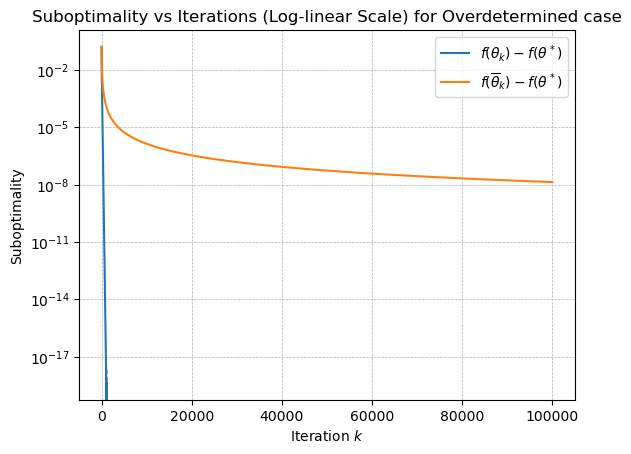

In [166]:
X = create_X(xs, 3)
theta_opt = theta_star(X, ys)
theta, suboptimality, avg_suboptimality = gradient_descent(np.zeros(4), X, ys, N, 10**5, theta_opt)
plot_suboptimality(suboptimality, avg_suboptimality, ' for Overdetermined case')

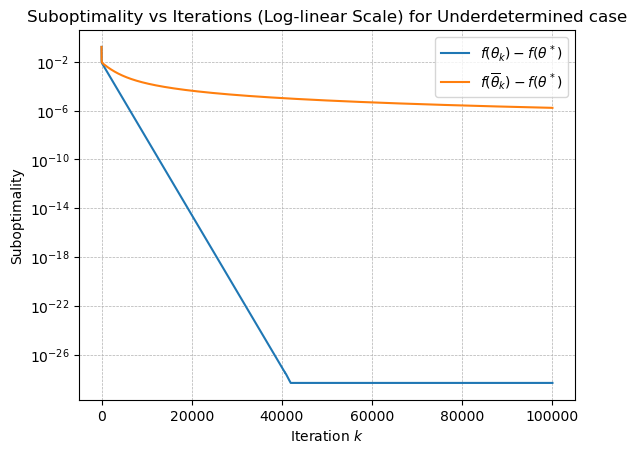

In [167]:
X = create_X(xs, 9)
theta, suboptimality, avg_suboptimality = gradient_descent(np.zeros(10), X, ys, N, 10**5)
plot_suboptimality(suboptimality, avg_suboptimality, ' for Underdetermined case')

---
__b)__ Next, do this by implementing the SGD method. The SGD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$
- For $k\geq 0$:
    - Pick $i\in\{1,\ldots,N\}$ uniformly at random
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} \nabla f_{i}(\theta_{k})$ for some $\gamma_{k}>0$.

Pick $\theta_{0} = 0$ and try the step sizes

1. $\gamma_{k} = \frac{0.1}{\beta}$,
2. $\gamma_{k} = \frac{0.1}{\beta(k+1)}$,
3. $\gamma_{k} = \frac{0.1}{\beta(\lfloor k/1000\rfloor+1)}$, where $\lfloor \cdot \rfloor$ is the floor function,

and run for $10^5 N$ iterations. Plot, in log-linear scale, both

- $f(\theta_{k})-f(\theta^{*})$ and
- $f(\overline{\theta}_{k})-f(\theta^{*})$ where $\overline{\theta}_{k} = \frac{1}{k+1}\sum_{l=0}^{k}\theta_{l}$,

as a function of iteration number $k$. Give comments:
- Does the step sizes matter? 
- Is there a difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases. 
- Which combination worked best? 
- Which combination of $\gamma_{k}$ and $n$ (i.e. overdetermined or underdetermined) corresponds the most to training of neural networks? This question qualitative and has no unique answer.

__Solution:__ 

1. Yes it does matter! This ic clearly seen in the plots.
2. Yes, it seems that for the underdetermined case we do not get convergence using $\gamma_3$, where as we do for the overdetermined case. The other stepsizes yield similar results.
3. Underdetermined case (n=9) with $\gamma_1$ seems to do the best.
4. For neural networks we usually have a lot of paramers and less data so we have the underdermined case, and in that case you would probably have a decreasing step size with number of iterations meaning $\gamma_2$ or $\gamma_3$.

In [168]:
import numpy as np

def grad_f_i(theta, X, Y, i):
    """
    Compute the gradient of the i-th data point for the least squares objective.

    Parameters:
    theta (numpy array): Parameter vector.
    X (numpy array): Design matrix of features.
    Y (numpy array): Target vector.
    i (int): Index of the data point to compute the gradient for.

    Returns:
    numpy array: Gradient of the i-th data point with respect to theta.
    """
    return 2 * X[i, :].T * (X[i, :] @ theta - Y[i])

def gamma_1(k, beta_val):
    """
    Compute the step size for iteration k using a constant learning rate strategy.

    Parameters:
    k (int): Current iteration number.
    beta_val (float): Lipschitz constant for gradient.

    Returns:
    float: Step size for iteration k.
    """
    return 0.1 / beta_val

def gamma_2(k, beta_val):
    """
    Compute the step size for iteration k using a decaying learning rate strategy (1/(k+1)).

    Parameters:
    k (int): Current iteration number.
    beta_val (float): Lipschitz constant for gradient.

    Returns:
    float: Step size for iteration k.
    """
    return 0.1 / (beta_val * (k + 1))

def gamma_3(k, beta_val):
    """
    Compute the step size for iteration k using a floor-based decaying learning rate strategy.

    Parameters:
    k (int): Current iteration number.
    beta_val (float): Lipschitz constant for gradient.

    Returns:
    float: Step size for iteration k.
    """
    return 0.1 / (beta_val * (np.floor(0.001 * k) + 1))

def stoch_gradient_descent(theta, X, Y, N, max_iter, gamma, theta_star=None):
    """
    Perform stochastic gradient descent to minimize the least squares objective function.

    Parameters:
    theta (numpy array): Initial parameter vector.
    X (numpy array): Design matrix of features.
    Y (numpy array): Target vector.
    N (int): Number of data points.
    max_iter (int): Maximum number of iterations.
    gamma (function): Step size function to use during the iterations.
    theta_star (numpy array, optional): The optimal parameter vector, if known.

    Returns:
    tuple: Final parameter vector (theta), suboptimality values, 
           and average suboptimality values over iterations.
    """
    theta_avg = theta  # Initialize average theta
    beta_val = beta(X, N)  # Compute Lipschitz constant for gradient
    f_star = 0 if theta_star is None else compute_f(theta_star, X, Y, N)  # Optimal function value

    # Lists to store suboptimality values at each iteration
    suboptimality = [compute_f(theta, X, Y, N) - f_star]
    avg_suboptimality = [suboptimality[0]]

    # Stochastic Gradient Descent loop
    for k in range(max_iter):
        # Randomly select a data point i
        i = np.random.randint(0, N)
        
        # Update theta using the gradient of the i-th data point
        theta = theta - gamma(k, beta_val) * grad_f_i(theta, X, Y, i)
        
        # Update the average of the iterates
        theta_avg = (k * theta_avg + theta) / (k + 1)

        # Compute and store suboptimality values
        suboptimality.append(compute_f(theta, X, Y, N) - f_star)
        avg_suboptimality.append(compute_f(theta_avg, X, Y, N) - f_star)

    return theta, suboptimality, avg_suboptimality


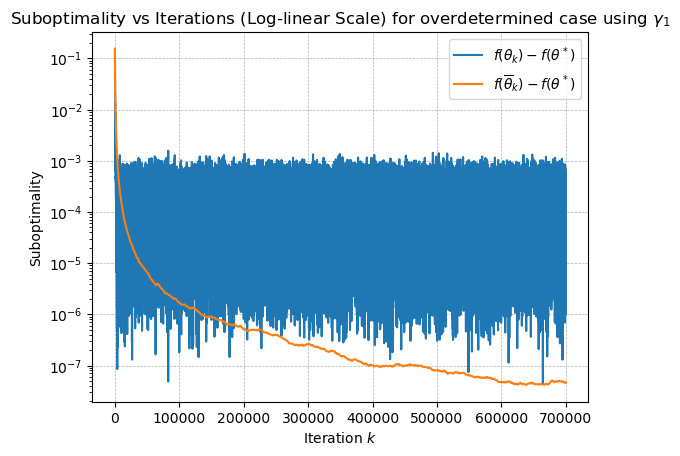

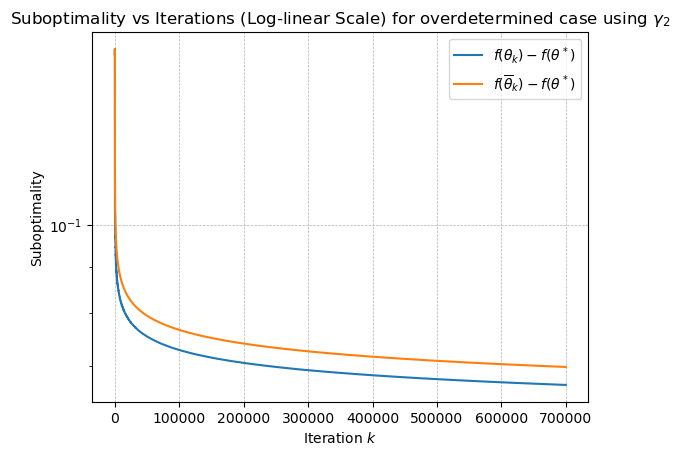

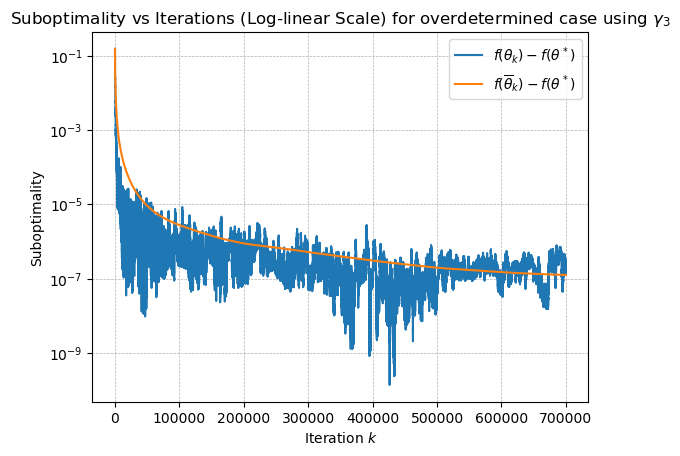

In [169]:
X = create_X(xs, 3)
theta_opt = theta_star(X, ys)
for gamma, s in zip([gamma_1, gamma_2, gamma_3], ['$\gamma_1$', '$\gamma_2$', '$\gamma_3$']):
    theta, suboptimality, avg_suboptimality = stoch_gradient_descent(np.zeros(4), X, ys, N, N*10**5, gamma, theta_opt)
    plot_suboptimality(suboptimality, avg_suboptimality, ' for overdetermined case using ' + s)

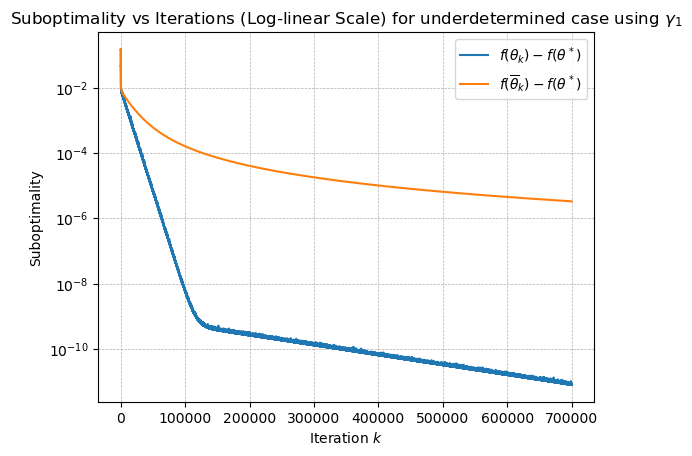

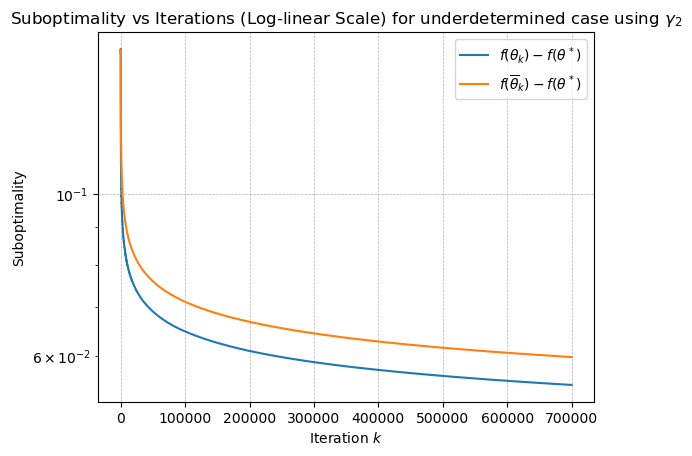

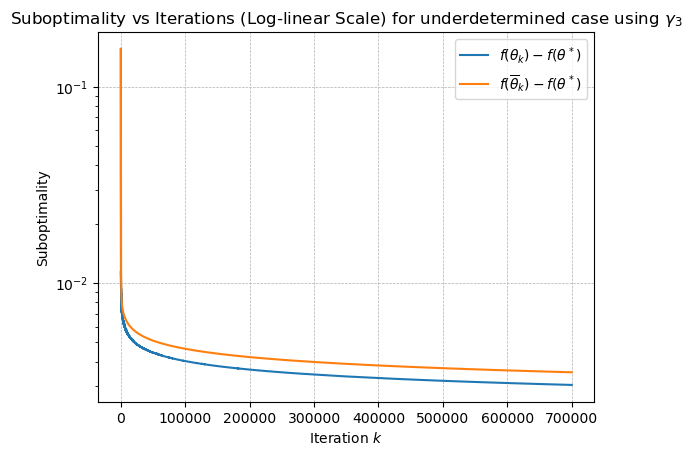

In [170]:
X = create_X(xs, 9)
for gamma, s in zip([gamma_1, gamma_2, gamma_3], ['$\gamma_1$', '$\gamma_2$', '$\gamma_3$']):
    theta, suboptimality, avg_suboptimality = stoch_gradient_descent(np.zeros(10), X, ys, N, N*10**5, gamma)
    plot_suboptimality(suboptimality, avg_suboptimality, ' for underdetermined case using ' + s)

---
### Exercise 3: Fitting points in $\mathbb{R}$ using fully connected feedforward neural networks

Again, we consider the data points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:


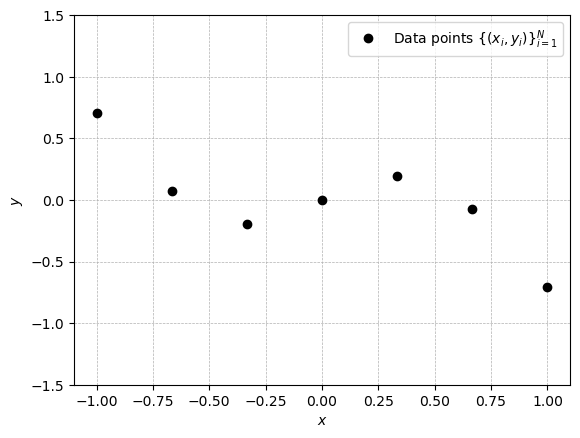

In [157]:
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

Polynomial fitting as in __Exercise 1__ and __Exercise 2__ gives:

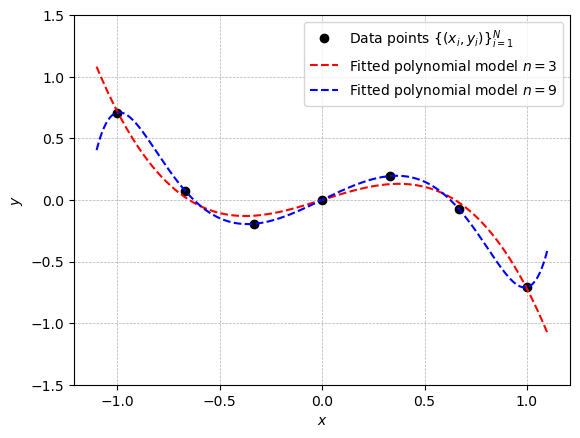

In [158]:
theta_star_n_9 = np.array([0,  0.8, 0, -1.9, 0, -0.583957507, 0, 0.28, 0, 0.695322536])
theta_star_n_3 = np.array([0,  0.523557283,  0, -1.24520755])
x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star_n_3), x),'r--')
axes.plot(x, np.polyval(np.flip(theta_star_n_9), x),'b--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial model $n=3$', r'Fitted polynomial model $n=9$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

In this exercise, we are going to explore fitting of these data points using fully connected feedforward neural networks. We will do this by considering the problem

$$
\begin{align}\label{eq:3}\tag{3}
		\underset{\theta}{\mathrm{minimize}} \frac{1}{N}\sum_{i=1}^N L(m(x_i;\theta),y_i)
\end{align}
$$

where $L:\mathbb{R}\times\mathbb{R}\rightarrow\mathbb{R}$ is the least squares loss, i.e.

$$
\begin{align*}
L(u,y) = (u-y)^{2}
\end{align*}
$$

for each $u,y\in\mathbb{R}$ and $m(\cdot;\theta):\mathbb{R}\rightarrow\mathbb{R}$ is a fully connected feedforward neural network model, i.e.

$$
\begin{align*}
m(x;\theta) = W_{D}\sigma_{D-1}(W_{D-1}\sigma_{D-2}(...\sigma_1(W_1 x + b_{1})...)+b_{D-1})+b_{D}	
\end{align*}
$$

for each $x\in\mathbb{R}$, where $\sigma_i$ is an activation functions that act elements-wise, for each $i=1,\ldots,D-1$, and

$$
\begin{align*}
    \theta = (W_{1},b_1,\ldots,W_{D},b_{D})
\end{align*}
$$

such that

$$
\begin{align*}
    \begin{cases}
        W_{1}\in\mathbb{R}^{f_{1} \times 1}& \text{ and }\quad b_{1} \in\mathbb{R}^{f_1}\\	
        W_{i}\in\mathbb{R}^{f_{i} \times f_{i-1}}& \text{ and }\quad b_{i} \in\mathbb{R}^{f_i} \quad\text{ for }\quad i=2,\ldots,D-1 \\
        W_{D}\in\mathbb{R}^{1 \times f_{D-1}}& \text{ and }\quad b_{D} \in\mathbb{R}.
    \end{cases}
\end{align*}
$$

In particular, we will study how the trained model $m(\cdot;\theta)$ depends on:
- The widths ($f_{i}$) and depth ($D$)
- Different activation functions ($\sigma_{i}$)
- Different initial points $\theta_{0}$ used in training
- Different training algorithms such as SGD and and Adam

We will also study:
- How the loss landscape of (3) looks along different directions at an "optimal point" of (3). (Note that we in general have no guarantees that our optimization algorithms will reach a true optimal point of (3) since the problem in nonconvex in general.)

_Remark:_
We will train the models using `pytorch`. `pytorch` is a widely used library or *module* for doing machine learning in python.
It allows the user to construct, train and evaluate neural networks.

- You will need to [install](https://anaconda.org/pytorch/pytorch) `pytorch`

Take a quick look at `pytorch`'s
- [tutorials](https://pytorch.org/tutorials/)
- [documentation](https://pytorch.org/docs/stable/index.html)

---
`pytorch` expects to get data from a `DataLoader` object. Below we create a `DataLoader` and provide it with our data:

In [159]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim

torch_xs = torch.tensor(xs.reshape((N,1)), dtype=torch.float32)
torch_ys = torch.tensor(ys.reshape((N,1)), dtype=torch.float32)
dataset = TensorDataset(torch_xs, torch_ys)
data_loader = DataLoader(dataset, batch_size=len(xs)) # other batch sizes are of course allowed

Typically in `pytorch`, models are defined as a child of the `nn.Module` class. Below, we create a model with:
- Depth $D=2$
- Width $f_1=10$
- ReLU as activation function 

In [160]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x

# Create an instance of the model class.
model = model()

In machine learning, the objective function in (3) is sometimes itself called a loss function. In fact, it is already [implemented](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) in `pytorch` and we create the corresponding loss function object below:

In [161]:
loss_fn = nn.MSELoss()

`torch.optim` is a `pytorch` package implementing various optimization algorithms. Below we create an optimizer object that allows us to take a SGD step with step-size/learning rate equal to $0.05$.

In [162]:
optimizer = optim.SGD(model.parameters(), lr=0.05)

Once we have defined the data loader, the model, the loss function and the optimizer as above, we can train the network by simply following these steps in a loop:
1. Sample a batch of data from our dataset
2. Compute the model's prediction on the batch
3. Compute the loss of the prediction w.r.t. ground-truth
4. Backpropagate the loss through the model's parameters
5. Perform one training step.

We will do this for $2000$ epochs.

In [163]:
for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

Epoch: 0	Loss: 0.12088524550199509
Epoch: 100	Loss: 0.06836767494678497
Epoch: 200	Loss: 0.0635087713599205
Epoch: 300	Loss: 0.05734605714678764
Epoch: 400	Loss: 0.05176607519388199
Epoch: 500	Loss: 0.04679521173238754
Epoch: 600	Loss: 0.04139893874526024
Epoch: 700	Loss: 0.036121685057878494
Epoch: 800	Loss: 0.03115578554570675
Epoch: 900	Loss: 0.02648863010108471
Epoch: 1000	Loss: 0.022269101813435555
Epoch: 1100	Loss: 0.018573354929685593
Epoch: 1200	Loss: 0.015415157191455364
Epoch: 1300	Loss: 0.012756087817251682
Epoch: 1400	Loss: 0.010547928512096405
Epoch: 1500	Loss: 0.008693314157426357
Epoch: 1600	Loss: 0.007131658960133791
Epoch: 1700	Loss: 0.005829156842082739
Epoch: 1800	Loss: 0.004754132591187954
Epoch: 1900	Loss: 0.0038671959191560745


Below we plot trained model:

Traing loss: 0.00315


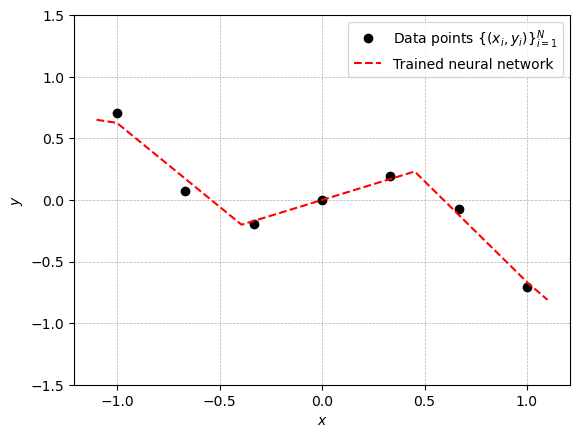

In [164]:
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Traing loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__a)__ First, we experiment with the widths ($f_{i}$) and depth ($D$).

Choose widths ($f_{i}$) and depth ($D$) such that:
- the network becomes underparameterized (motive why it is underparameterized)
- the network becomes overparameterized (motive why it is overparameterized)

and train the model as above.

In this subproblem, keep the activation functions fixed as ReLU. However, you are free to experiment with the learning rate and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

In the underdetermined case, we have many parameters to fit for quite simple data, this means that we will get quite a good fit, and a ver low loss. With the overdetermined case, we have less paramers than data, so we will get a "poor" fit and a high loss. Wether it is a good or bad model depends on the use case. The first one will be very over fit, so for such simple data that complex of a model is not needed.

Epoch: 0	Loss: 0.15416935086250305
Epoch: 100	Loss: 0.03963013365864754
Epoch: 200	Loss: 0.015833096578717232
Epoch: 300	Loss: 0.0044555505737662315
Epoch: 400	Loss: 0.007040679920464754
Epoch: 500	Loss: 0.003614844987168908
Epoch: 600	Loss: 0.002674603834748268
Epoch: 700	Loss: 0.000887156929820776
Epoch: 800	Loss: 0.0006763748824596405
Epoch: 900	Loss: 0.0003856199618894607
Epoch: 1000	Loss: 0.0001847481617005542
Epoch: 1100	Loss: 7.690677011851221e-05
Epoch: 1200	Loss: 2.8243803171790205e-05
Epoch: 1300	Loss: 8.683500709594227e-06
Epoch: 1400	Loss: 2.5139156605291646e-06
Epoch: 1500	Loss: 1.0324750974177732e-06
Epoch: 1600	Loss: 7.309536727007071e-07
Epoch: 1700	Loss: 6.337798481581558e-07
Epoch: 1800	Loss: 5.855314952896151e-07
Epoch: 1900	Loss: 5.452762934510247e-07
Training loss: 0.00000


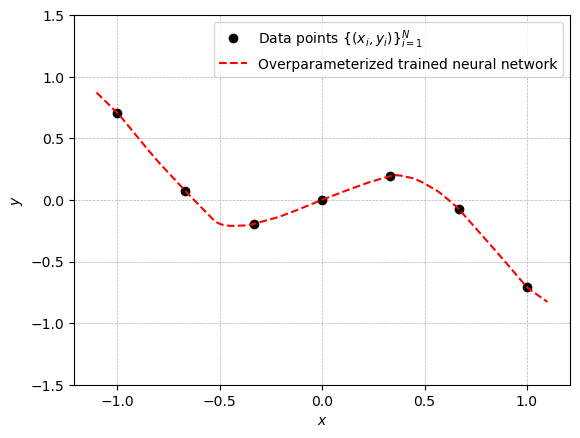

In [176]:
# Underdetermined case
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=100)
        self.linear2 = nn.Linear(in_features=100, out_features=100)
        self.linear3 = nn.Linear(in_features=100, out_features=1)


    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)

        return x


model = model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)


for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:
        batch_x, batch_y = batch
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        losses_in_epoch.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Overparameterized trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Training loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

Epoch: 0	Loss: 0.228165864944458
Epoch: 100	Loss: 0.0842810869216919
Epoch: 200	Loss: 0.07777656614780426
Epoch: 300	Loss: 0.0679454654455185
Epoch: 400	Loss: 0.06769444048404694
Epoch: 500	Loss: 0.06768964976072311
Epoch: 600	Loss: 0.06768937408924103
Epoch: 700	Loss: 0.06768937408924103
Epoch: 800	Loss: 0.06768937408924103
Epoch: 900	Loss: 0.06768937408924103
Epoch: 1000	Loss: 0.06768937408924103
Epoch: 1100	Loss: 0.06768937408924103
Epoch: 1200	Loss: 0.06768937408924103
Epoch: 1300	Loss: 0.06768937408924103
Epoch: 1400	Loss: 0.06768937408924103
Epoch: 1500	Loss: 0.06768937408924103
Epoch: 1600	Loss: 0.06768937408924103
Epoch: 1700	Loss: 0.06768937408924103
Epoch: 1800	Loss: 0.06768937408924103
Epoch: 1900	Loss: 0.06768937408924103
Training loss: 0.06769


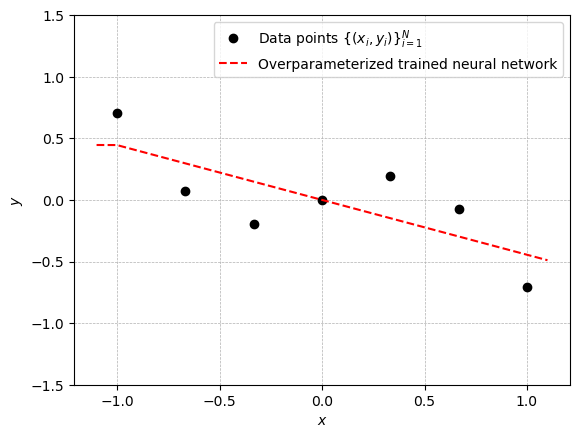

In [177]:
# Underdetermined case
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=2)
        self.linear2 = nn.Linear(in_features=2, out_features=1)



    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x


model = model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)


for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:
        batch_x, batch_y = batch
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        losses_in_epoch.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Overparameterized trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Training loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__b)__ Second, we will try out different activation functions ($\sigma_{i}$).

Train two overparameterized networks with the same widths and depth, using
- ReLU activation at each layer for one of the networks, and
- 4 * sigmod activation at each layer for the other network.

You are free to experiment with the learning rate and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

We clearly see that the network trained using ReLU ends up having a lower training loss than the network trained using 4 * sigmod. From the plots we see that the ReLU trained network ends up having a perfect fit to the data, whereas the 4 * sigmod trained network is underfit.

Epoch: 0	Loss: 0.1674347221851349
Epoch: 100	Loss: 0.06030518189072609
Epoch: 200	Loss: 0.048836950212717056
Epoch: 300	Loss: 0.03958598151803017
Epoch: 400	Loss: 0.02907637134194374
Epoch: 500	Loss: 0.017701949924230576
Epoch: 600	Loss: 0.008462325669825077
Epoch: 700	Loss: 0.003506141249090433
Epoch: 800	Loss: 0.0013311462244018912
Epoch: 900	Loss: 0.0004968756111338735
Epoch: 1000	Loss: 0.00018419271509628743
Epoch: 1100	Loss: 6.868566561024636e-05
Epoch: 1200	Loss: 2.6378253096481785e-05
Epoch: 1300	Loss: 1.0922007277258672e-05
Epoch: 1400	Loss: 5.221255833021132e-06
Epoch: 1500	Loss: 3.0769499517191434e-06
Epoch: 1600	Loss: 2.2419626475311816e-06
Epoch: 1700	Loss: 1.894032948257518e-06
Epoch: 1800	Loss: 1.7322780649919878e-06
Epoch: 1900	Loss: 1.643280597818375e-06
Training loss: 0.00000


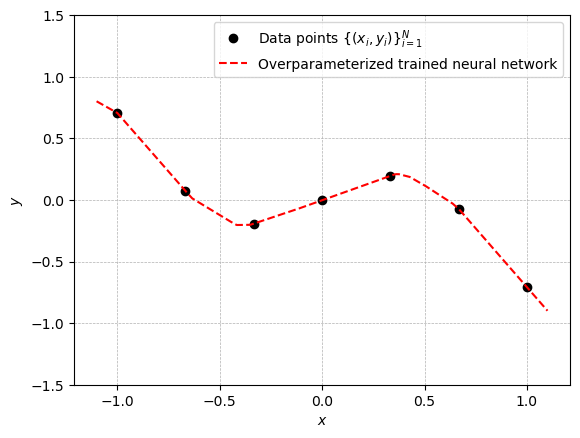

In [187]:
# Write your code here
# Underdetermined case
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=20)
        self.linear2 = nn.Linear(in_features=20, out_features=20)
        self.linear3 = nn.Linear(in_features=20, out_features=1)


    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)

        return x


model = model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)


for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:
        batch_x, batch_y = batch
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        losses_in_epoch.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Overparameterized trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Training loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

Epoch: 0	Loss: 0.2106911689043045
Epoch: 100	Loss: 0.15563741326332092
Epoch: 200	Loss: 0.15540733933448792
Epoch: 300	Loss: 0.15507081151008606
Epoch: 400	Loss: 0.15431621670722961
Epoch: 500	Loss: 0.14913713932037354
Epoch: 600	Loss: 0.07825731486082077
Epoch: 700	Loss: 0.07281185686588287
Epoch: 800	Loss: 0.07237831503152847
Epoch: 900	Loss: 0.07205110043287277
Epoch: 1000	Loss: 0.07178469002246857
Epoch: 1100	Loss: 0.07155958563089371
Epoch: 1200	Loss: 0.07136398553848267
Epoch: 1300	Loss: 0.07119043171405792
Epoch: 1400	Loss: 0.07103387266397476
Epoch: 1500	Loss: 0.07089081406593323
Epoch: 1600	Loss: 0.07075861841440201
Epoch: 1700	Loss: 0.07063538581132889
Epoch: 1800	Loss: 0.07051962614059448
Epoch: 1900	Loss: 0.07041018456220627
Training loss: 0.07031


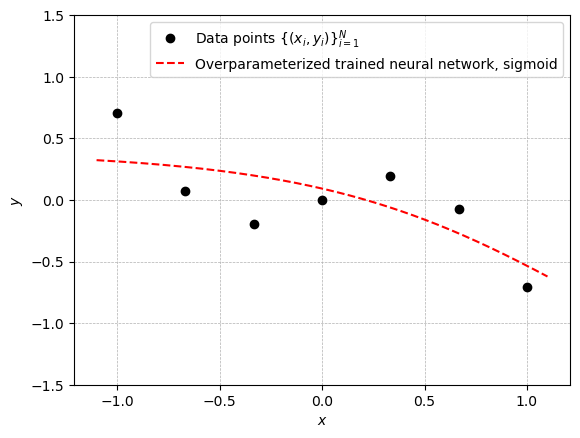

In [188]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=20)
        self.linear2 = nn.Linear(in_features=20, out_features=20)
        self.linear3 = nn.Linear(in_features=20, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = 4*F.sigmoid(x)
        x = self.linear2(x)
        x = 4*F.sigmoid(x)
        x = self.linear3(x)
        return x


model = model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:
        batch_x, batch_y = batch
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        losses_in_epoch.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Overparameterized trained neural network, sigmoid'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Training loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__c)__ Third, we consider different initial points ($\theta_{0}$) used in training.


For an overparameterized network with ReLU activation functions at each layer and fixed widths and depth, train it with different initial point (note that the constructor of `nn.Module` will initialize the parameters randomly).

Does the initial point affect the final trained network? Give a qualitative and quantitative analysis.

__Solution:__ 

The trained network is indeed affected by the initial point, which can be seen in the weights and biases, and th different losses. However, the difference is almost negligible, and qualitatively, looking at the plots, they are almost the same, with minor differences.

Epoch: 0	Loss: 0.17696939408779144
Epoch: 100	Loss: 0.06403757631778717
Epoch: 200	Loss: 0.055453039705753326
Epoch: 300	Loss: 0.04881657287478447
Epoch: 400	Loss: 0.04168800637125969
Epoch: 500	Loss: 0.03337325155735016
Epoch: 600	Loss: 0.024593617767095566
Epoch: 700	Loss: 0.016590377315878868
Epoch: 800	Loss: 0.010221711359918118
Epoch: 900	Loss: 0.0057045770809054375
Epoch: 1000	Loss: 0.002875282894819975
Epoch: 1100	Loss: 0.0013223564019426703
Epoch: 1200	Loss: 0.0005655625718645751
Epoch: 1300	Loss: 0.0002293943689437583
Epoch: 1400	Loss: 8.975587843451649e-05
Epoch: 1500	Loss: 3.429069693083875e-05
Epoch: 1600	Loss: 1.2910934856336098e-05
Epoch: 1700	Loss: 4.814805379282916e-06
Epoch: 1800	Loss: 1.7854372345027514e-06
Epoch: 1900	Loss: 6.598345976271958e-07
Training loss: 0.00000


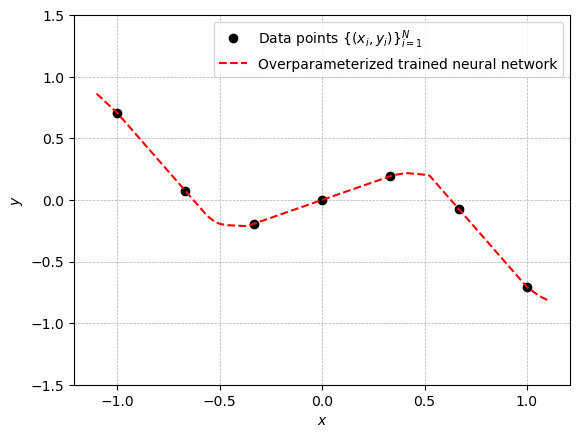

In [194]:
# Write your code here
# Underdetermined case
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=20)
        self.linear2 = nn.Linear(in_features=20, out_features=20)
        self.linear3 = nn.Linear(in_features=20, out_features=1)


    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)

        return x


model = model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)


for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:
        batch_x, batch_y = batch
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        losses_in_epoch.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Overparameterized trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Training loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

In [195]:
# Hint: The code below prints the parameters of the network 'model'
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

# Write your code here

linear1.weight tensor([[ 0.6901],
        [-0.5232],
        [ 0.8626],
        [ 0.1715],
        [-0.8659],
        [ 0.5380],
        [ 0.5133],
        [ 0.6184],
        [ 0.4896],
        [-0.9122],
        [ 0.5164],
        [-0.5015],
        [ 0.7419],
        [-0.1267],
        [-0.0711],
        [-0.1648],
        [-0.7045],
        [-0.6094],
        [-0.0208],
        [ 0.8374]])
linear1.bias tensor([-0.2808,  0.1788,  0.8626,  0.9579, -0.3176,  0.7218,  0.2389, -0.9346,
        -0.6506,  0.9122,  0.7088,  0.5015,  0.9283,  0.2378,  0.2378,  0.3771,
        -0.7739, -0.3023, -0.5336, -0.8884])
linear2.weight tensor([[ 4.0415e-01,  2.2927e-01,  1.3389e-01,  1.6359e-02, -4.6793e-01,
          2.0736e-01, -2.7901e-01, -1.4490e-01,  7.3826e-02,  2.2961e-01,
          1.2726e-01, -1.2351e-01,  1.8004e-01, -1.5181e-01, -1.9311e-01,
          1.7636e-01, -1.2482e-01, -4.3564e-01, -1.1290e-01, -4.7675e-02],
        [-1.8260e-01,  1.1550e-01,  3.9449e-02,  5.8097e-02, -7.7120e-03,


Epoch: 0	Loss: 0.15873980522155762
Epoch: 100	Loss: 0.05798053741455078
Epoch: 200	Loss: 0.046893633902072906
Epoch: 300	Loss: 0.03586574271321297
Epoch: 400	Loss: 0.024896318092942238
Epoch: 500	Loss: 0.015288479626178741
Epoch: 600	Loss: 0.0088620875030756
Epoch: 700	Loss: 0.005558425094932318
Epoch: 800	Loss: 0.0037245529238134623
Epoch: 900	Loss: 0.002500169677659869
Epoch: 1000	Loss: 0.0016515238676220179
Epoch: 1100	Loss: 0.0010750343790277839
Epoch: 1200	Loss: 0.0007058352930471301
Epoch: 1300	Loss: 0.0004690351488534361
Epoch: 1400	Loss: 0.0003208187990821898
Epoch: 1500	Loss: 0.00023053644690662622
Epoch: 1600	Loss: 0.0001753709657350555
Epoch: 1700	Loss: 0.00014019638183526695
Epoch: 1800	Loss: 0.0001157674560090527
Epoch: 1900	Loss: 9.783769928617403e-05
Training loss: 0.00008


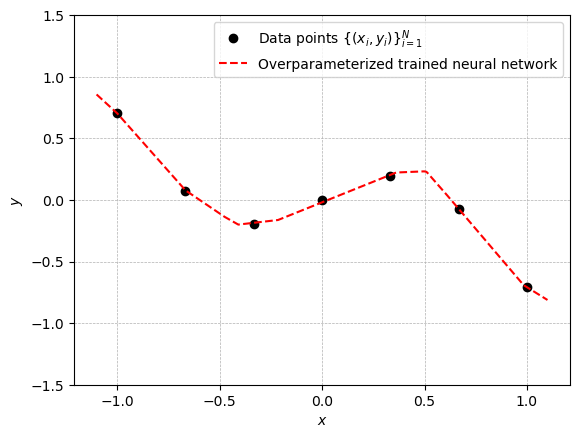

In [196]:
# Write your code here
# Underdetermined case
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=20)
        self.linear2 = nn.Linear(in_features=20, out_features=20)
        self.linear3 = nn.Linear(in_features=20, out_features=1)


    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)

        return x


model = model()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)


for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:
        batch_x, batch_y = batch
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        losses_in_epoch.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Overparameterized trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Training loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

In [193]:
# Hint: The code below prints the parameters of the network 'model'
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

# Write your code here

linear1.weight tensor([[-0.9409],
        [ 0.5726],
        [ 1.1256],
        [-0.2895],
        [-0.8290],
        [-0.2455],
        [ 0.9333],
        [ 0.7723],
        [-0.6013],
        [ 0.6415],
        [ 0.0630],
        [ 0.6628],
        [-0.9190],
        [ 0.4480],
        [-1.0114],
        [ 0.3779],
        [-0.9627],
        [ 0.2082],
        [-0.5398],
        [ 0.5625]])
linear1.bias tensor([ 0.2029, -0.1516, -0.5330,  0.8827, -0.5526,  0.4283,  0.5195, -0.8737,
        -1.0000,  0.4186, -0.6622,  0.3935,  0.5076, -0.2402, -0.4313,  0.8107,
        -0.0953, -0.4276, -0.2469, -0.6162])
linear2.weight tensor([[ 0.0984,  0.1191,  0.1275, -0.1635,  0.1067, -0.2132, -0.2355,  0.0849,
         -0.1924, -0.1273, -0.1890, -0.2051,  0.2532, -0.1934,  0.3611, -0.1251,
          0.2601, -0.0062,  0.2538, -0.0360],
        [ 0.0092,  0.1256,  0.0686,  0.0859, -0.0436,  0.0798,  0.1590, -0.2064,
         -0.1068,  0.0091, -0.0556, -0.1815,  0.0576,  0.0654, -0.1942,  0.2231,
 

__d)__ Fourth, we consider different training algorithms.

Compare
- SGD, and
- Adam (`optimizer = optim.Adam(model.parameters(), lr=0.1)`)

for an overparameterized network with ReLU activation functions at each layer and fixed widths and depth.

You are free to experiment with the learning rates and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

_Fill in your solution here!_

In [16]:
# Write your code here

__e)__ Fifth, we study the loss landscape of a trained network along different directions in parameter space.  


Train an overparameterized network with ReLU activation functions at each layer. Denote it by $m(\cdot,\theta^{*})$ where $\theta^{*}$ are the learned parameters. Sample $\Delta$, with the same size as $\theta^{*}$, from a standard normal distribution (and keep it fixed). Plot 

$$
\begin{align*}
    \frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta\right),y_i\right)
\end{align*}
$$

as a function of $t\in[-1,1]$ (or even a larger interval). 

Do the same for another network with the same widths and depth, but using 4 * sigmoid activation functions at each layer. 

How does these two cases differ? Give a qualitative analysis. 

_Hints:_ You can get the parameters as a dictionary of a model by using `model.state_dict()`, updating the parameters in the dictionary, and then loading the updated parameters into the model using `model.load_state_dict(...)`. If you use this approach it is helpful to know the difference between [a shallow copy and a deep copy of a dictionary](https://thispointer.com/python-how-to-copy-a-dictionary-shallow-copy-vs-deep-copy/) You might need to cut off values of the loss that are too high to get a nice plot.

_Optional:_ Plot in two direction at the same time, i.e. plot 
$$
\begin{align*}
    \frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta_{t} + s \Delta_{s}\right),y_i\right)
\end{align*}
$$

as a function of $t,s\in[-1,1]$. 

__Solution:__ 

_Fill in your solution here!_

In [17]:
# Write your code here

---
### Exercise 4: Implicit regularization via small norm in polynomial fitting in $\mathbb{R}$
_Remark:_ You should solve this exercise using `numpy` primarily.

The purpose of this exercise is to study optimization problems in the overparameterized regime, i.e., when there are multiple solutions to choose from, and see how the norm of a given solution may affect generalization.   

Again, we consider the data points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:

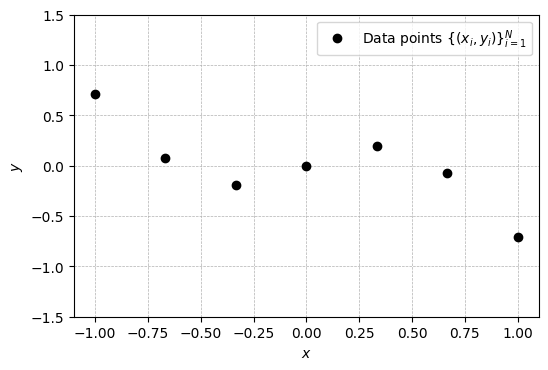

In [18]:
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

We wish to fit a polynomial model $m(\cdot;\theta)$ of degree $n=9$ (overparameterized) to the data points  $\{(x_{i},y_{i})\}_{i=1}^{N}$. One solution $m(\cdot;\theta^{*})$ is given below:

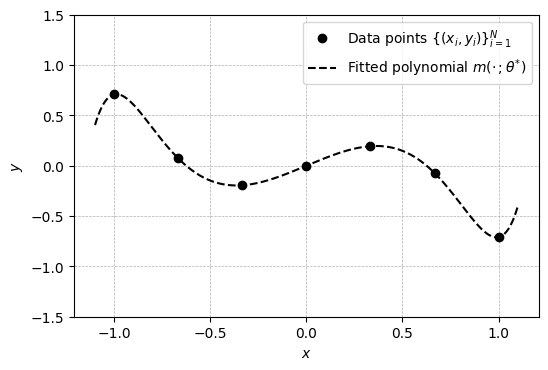

In [19]:
theta_star = np.array([0,  0.8, 0, -1.9, 0, -0.583957507, 0, 0.28, 0, 0.695322536])
x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star), x),'k--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial $m(\cdot\,;\theta^{*})$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

---

__a)__ Recall from __Exercise 1__ __g)__ that given a candidate point $a\in\mathbb{R}^{n+1}$, we can obtain a solution via the Euclidean projection formula $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$. Initialize $a$ randomly and compute the projection $\theta^{*}$ and plot the fitted polynomial $m(\cdot;\theta^{*})$ as above. Vary the magnitude or norm of $\theta^{*}$ indirectly by multiplying $a$ by $0$, $10$, $100$ and $1000$. Visually, how does the generalization of $m(\cdot;\theta^{*})$ correspond to the norm of $\theta^{*}$?

__Solution:__ 

_Fill in your solution here!_

In [20]:
n = 9 # degree
a = np.random.randn(n + 1)

# Write your code here

__b)__ Implement the GD method for optimization problem (2) in __Exercise 1__ above, starting at $\theta_{0}=0$, using step size $\gamma_{k} = 1/\beta$, and verify that the resulting sequence $\{\theta_{k}\}_{k\geq0}$ converges to $\theta^{*}$, where $\theta^{*}$ is the Euclidean projection starting from the candidate point $a=0$. I.e., the GD method converges to the solution with the smallest norm. Do this by plotting $||\theta_{k}-\theta^{*}||_{2}^{2}$ as a function of $k$ in log-linear scale.

_Remark:_ We consider $\theta_{k}$ to have converged to $\theta^{*}$ if $||\theta_{k}-\theta^{*}||_{2}^{2} \leq 10^{-16}$.


__Solution:__ 

_Fill in your solution here!_

In [21]:
# Write your code here

---

__c)__ Implement the SGD method for optimization problem (1) in __Exercise 1__ above, starting at $\theta_{0}=0$, using step size $\gamma_{k} = 0.1 / \beta$, and verify that the resulting sequence $\{\theta_{k}\}_{k\geq0}$ converges to $\theta^{*}$, where $\theta^{*}$ is the Euclidean projection starting from the candidate point $a=0$. I.e., the SGD method converges to the solution with the smallest norm. Do this by plotting $||\theta_{k}-\theta^{*}||_{2}^{2}$ as a function of $k$ in log-linear scale.


__Solution:__ 


_Fill in your solution here!_

In [22]:
# Write your code here

---

__d)__ The ADAM optimization method is given by:

- Pick $\theta_{0}\in\mathbb{R}^{n+1}$, $\hat{m}_{0}=\hat{v}_{0}=0\in\mathbb{R}^{n+1}$, $b_{m},b_{v}\in(0,1)$ and $\gamma,\epsilon>0$.
- For $k\geq 0$:
    - Pick $i\in\{1,\ldots, N\}$ uniformly at random
    - Set $g_{k+1} = \nabla f_{i}(\theta_{k})$
    - Set $\hat{m}_{k+1} = b_{m}\hat{m}_{k}+(1-b_{m})g_{k+1}$
    - Set $\hat{v}_{k+1} = b_{v}\hat{v}_{k}+(1-b_{v})g_{k+1}^{2}$ (element-wise square)
    - Set $m_{k+1}=\hat{m}_{k+1}/(1-b_{m}^{k+1})$
    - Set $v_{k+1}=\hat{v}_{k+1}/(1-b_{v}^{k+1})$
    - Set $\theta_{k+1} = \theta_{k} - \gamma m_{k+1} ./ (\sqrt{v_{k+1}} + \epsilon\mathbb{1})$ (element-wise division and square root)

Use the [suggested values](https://arxiv.org/pdf/1412.6980.pdf):

- $b_{m} = 0.9$
- $b_{v} = 0.999$
- $\gamma = 0.001$
- $\epsilon = 10^{-8}$

Implement the ADAM optimization method for optimization problem (1) in __Exercise 1__ above, starting at $\theta_{0}=0$. Does ADAM converge to the minimum norm solution? Plot the resulting model.

__Solution:__ 


_Fill in your solution here!_

In [23]:
# Write your code here

---

__e)__ The ADAM optimization method scales the gradient independently in each coordinate. We call such methods diagonally scaled methods. 

Now, recall the scaled projection problem from __Exercise 1__ __g)__ above: given a candidate point $a\in\mathbb{R}^{n+1}$, we can obtain a solution via the scaled projection formula $\theta^{*} = a - H^{-1}X^{T}(X H^{-1} X^{T})^{-1}(Xa-Y)$.


Consider the candidate point $a\in\mathbb{R}^{n+1}$ and the highly skewed diagonal scaling matrix $H\in\mathbb{S}^{n+1}_{++}$ below:

In [24]:
a = np.zeros(n + 1)
H_inv = np.diag(np.logspace(-10, 10, num = n + 1)) # the inverse of H

Plot the data points $\{(x_{i},y_{i})\}_{i=1}^{N}$ and the fitted polynomial $m(\cdot;\theta^{*})$ in the same figure using the scaled projection formula. Visually, does the fitted polynomial $m(\cdot;\theta^{*})$ seem to generalize well?

__Solution:__ 

_Fill in your solution here!_

In [25]:
# Write your code here

---

__f)__ The scaled GD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$ and $H\in\mathbb{S}_{+}^{n+1}$
- For $k\geq 0$:
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} H^{-1}\nabla f(\theta_{k})$ for some $\gamma_{k}>0$.

For numerical reasons (i.e., so that the algorithm converges in reasonable time), consider the less skewed diagonal scaling matrix below:

In [26]:
H_inv = np.diag(np.logspace(-3, 0, num = n + 1)) # the inverse of H

Starting at $\theta_{0}=0$ and using the step size $\gamma_{k}=1/\beta_{H}$, show that the scaled GD method converges to the scaled projection point $\theta^{*}=a - H^{-1}X^{T}(X H^{-1} X^{T})^{-1}(Xa-Y)$ for $a=0$.

Here, $\beta_{H}$ is given by

\begin{align}
    \beta_{H} = \frac{2}{N}\left\lVert H^{-\frac{1}{2}}X^{T}X H^{-\frac{1}{2}} \right\rVert_{2},
\end{align}

where $H^{-\frac{1}{2}}$ is the symmetric square root of $H^{-1}$.

__Solution:__ 

_Fill in your solution here!_

In [27]:
# Write your code here

---
### Exercise 5: Implicit regularization via flatness
_Remark:_ You should solve this exercise using `numpy` primarily.

It has been observed in the [literature](https://arxiv.org/pdf/1609.04836.pdf) that flat mimima tend to lead to better generalization than sharp minima. In this exercise, we empirically verfiy that SGD tends to favour flat mimima.

Consider the finite-sum problem problem
$$
\begin{equation}
\begin{aligned}
& \underset{x\in\mathbb{R}}{\mathrm{minimize}}
& & f(x)= \frac{1}{N} \sum_{i=1}^{N}f_{i}(x)
\end{aligned}
\end{equation}
$$
where the $f_{i}$'s and $f$ are given below: (the derivatives are also given for convenience.)

In [ ]:
from functools import partial

def loss_term(phase, x):
    if x < 50/11:
        value = x**2
    elif x < 50/9:
        value = 100*(x - 5)**2
    else:
        value = x**2
    return value + 20*np.sin(10*x + phase)*np.cos(2*(x - 5))

def derivative_of_loss_term(phase, x):
    if x < 50/11:
        value = 2*x
    elif x < 50/9:
        value = 200*(x - 5)
    else:
        value = 2*x
    return value + 20*(10*np.cos(10*x + phase)*np.cos(2*(x - 5)) - 2*np.sin(10*x + phase)*np.sin(2*(x - 5)))

N = 2000 # the number of summands
np.random.seed(0)
phases = 2 * np.pi * np.random.rand(N)

# The induvidual summands f_i as a list
f_i_s = list(map(lambda phase : np.vectorize(partial(loss_term, phase)), phases))

# The function f
f = np.vectorize(lambda x : np.mean([f_i(x) for f_i in f_i_s]))

# Derivatives are provided for convenience
derivative_f_i_s = list(map(lambda phase : np.vectorize(partial(derivative_of_loss_term, phase)), phases))
derivative_f = np.vectorize(lambda x : np.mean([d_f_i(x) for d_f_i in derivative_f_i_s]))

x = np.linspace(-6, 7, num=1000)
y_1 = f_i_s[0](x)
y_2 = f_i_s[1](x)
y = f(x)

fig, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].plot(x, y)
axes[0].legend(["$f(x)$"])
axes[0].set_xlabel('$x$')
axes[1].plot(x, y_1)
axes[1].plot(x, y_2)
axes[1].legend(["$f_{1}(x)$", "$f_{2}(x)$"])
axes[1].set_xlabel('$x$');

Note that the function $f$ has a flat minimum close to $0$ and a sharp minimum close to $5$. Implement both GD and SGD for this problem: 

- Start at $x_{0}=5$, i.e., close to the sharp minimum. 
- Let both GD and SGD go for $2000$ iterations.
- Use the same constant step size $\gamma_{k} = 0.001$ for SGD and GD. 
- You should notice that SDG manages to escape the sharp minimum and find the flat minimum (most of the time), while GD does not. Illustrate this by plotting $x_{k}$ as a function of $k$ for both methods.  (Common mistake: We are not asking for $f(x_k)$ vs $x_k$.)

Give some brief comments.

__Solution:__

_Fill in your solution here!_

In [ ]:
# Write your code here